# Regresión Líneal

## Imports Necesarios

In [16]:
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

## Visualizar Archivo Leído

In [17]:
np.random.seed(1)

#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)



In [18]:
# Ver los 1ros registros
data

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
4,2.93,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.254218,0.035
5,2.96,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.035000,0.005
6,2.81,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.035000,0.005000,0.000
7,2.73,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.035000,0.005000,0.000000,0.000
8,2.87,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.035000,0.005000,0.000000,0.000000,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104827,2.67,0.34800,0.338000,0.32700,0.31700,0.306000,0.286000,0.221000,0.190000,0.170000,...,0.226000,0.22600,0.22600,0.22600,0.226000,0.226000,0.226000,0.226000,0.226000,0.226
104828,2.57,0.33800,0.327000,0.31700,0.30600,0.286000,0.221000,0.190000,0.170000,0.211000,...,0.226000,0.22600,0.22600,0.22600,0.226000,0.226000,0.226000,0.226000,0.226000,0.226
104829,2.29,0.32700,0.317000,0.30600,0.28600,0.221000,0.190000,0.170000,0.211000,0.251000,...,0.226000,0.22600,0.22600,0.22600,0.226000,0.226000,0.226000,0.226000,0.226000,0.226
104830,1.91,0.31700,0.306000,0.28600,0.22100,0.190000,0.170000,0.211000,0.251000,0.301000,...,0.226000,0.22600,0.22600,0.22600,0.226000,0.226000,0.226000,0.226000,0.226000,0.226


## Separar Datos de Entrenamiento (Train) y Test

In [19]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
#filtered_data = data

#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
#data = data_test2
data_train, data_test = train_test_split(data, test_size=0.2, random_state=200)

#data_train = data

dataset_train = data_train.values
x_train = dataset_train[:,0:45]
y_train = dataset_train[:,45]


dataset_test = data_test.values
x_test = dataset_test[:,0:45]
y_test = dataset_test[:,45]


#dataX2 =  pd.DataFrame()
#dataX2["ws"] =data_train["ws"]
#dataX2["wd"] =data_train["wd"]
 
#X_train = np.array(dataX2)
#y_train = data_train['wp1'].values

In [20]:
x_train[0]

array([5.35486486, 0.266     , 0.266     , 0.266     , 0.266     ,
       0.266     , 0.266     , 0.266     , 0.266     , 0.272     ,
       0.278     , 0.283     , 0.289     , 0.295     , 0.301     ,
       0.306     , 0.312     , 0.318     , 0.324     , 0.329     ,
       0.335     , 0.341     , 0.347     , 0.352     , 0.358     ,
       0.364     , 0.37      , 0.375     , 0.381     , 0.387     ,
       0.393     , 0.398     , 0.404     , 0.433     , 0.439     ,
       0.444     , 0.45      , 0.456     , 0.462     , 0.467     ,
       0.473     , 0.479     , 0.485     , 0.49      , 0.496     ])

In [21]:
y_train[0]

0.502

In [22]:
x_test

array([[ 2.34 ,  0.251,  0.226, ...,  0.045,  0.06 ,  0.025],
       [10.5  ,  0.03 ,  0.   , ...,  0.707,  0.722,  0.882],
       [ 3.23 ,  0.075,  0.175, ...,  0.03 ,  0.025,  0.015],
       ...,
       [ 2.82 ,  0.055,  0.055, ...,  0.   ,  0.   ,  0.   ],
       [ 2.85 ,  0.045,  0.015, ...,  0.   ,  0.   ,  0.   ],
       [ 2.79 ,  0.119,  0.12 , ...,  0.08 ,  0.115,  0.085]])

In [23]:
y_test

array([0.251, 0.852, 0.025, ..., 0.   , 0.   , 0.143])

## Crear Modelo, Entrenarlo y Predeccir

In [24]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(x_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
#y_pred = regr.predict(dataX2)
y_pred_train = regr.predict(x_train)
y_pred_test = regr.predict(x_test)

In [25]:
##from sklearn.ensemble import GradientBoostingRegressor
#gbr = GradientBoostingRegressor(loss="ls", learning_rate=.05, n_estimators=250, max_depth=3, min_samples_leaf=25)
#gbr.fit(x_train, y_train)
#y_pred_test = gbr.predict(x_test)
#r2_score(y_test, y_pred_test)

In [26]:
import statsmodels.api as sm
my_ols = sm.OLS(y_train,x_train).fit()
y_pred_test = my_ols.predict(x_test)
r2_score(y_test, y_pred_test)

0.9202240591498613

## Obtener Metricas del Modelo

In [27]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)

# Este es el valor donde corta el eje Y (en X=0)
#print('Independent term: \n', regr.intercept_)

# Error Cuadrado Medio
print("Mean squared error Train: %.2f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_pred_test))

rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE train: %.2f" % (rmse) )

# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))
#mean_absolute_error
print('Coefficient of determination Test (R^2): %.2f' % r2_score(y_test, y_pred_test))
print('mean_absolute_error train: %.2f' % mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_error test: %.2f' % mean_absolute_error(y_test, y_pred_test))

Coefficients: 
 [ 5.73958175e-03 -2.05908609e-02  3.85099761e-02 -1.54036996e-03
 -8.51264448e-03 -1.36599113e-02  2.47055165e-02  7.45791171e-03
 -1.46380099e-02  1.79713659e-02  7.06755255e-03  5.96091417e-02
 -5.44034735e-01  5.49465987e-01  2.44177687e-03  1.24013567e-03
  2.81987703e-03  1.86489692e-03 -8.10838343e-03 -5.09359820e-02
  1.13101146e-01 -9.01440435e-02  3.27440749e-02  4.72814026e-03
  5.94241803e-03 -1.86085520e-02  1.50174433e-02 -2.63115511e-03
  5.02036061e-03 -3.84675475e-03 -8.55426106e-04 -6.76487062e-03
  1.89370022e-02 -4.02934504e-03 -2.22346271e-02  2.06723371e-02
 -2.30251751e-02  5.24718900e-02 -4.95460444e-02 -8.54405932e-03
  1.62184727e-02 -2.03276200e-02 -1.52402490e-02 -1.45737097e-02
  9.03826544e-01]
Mean squared error Train: 0.00
Mean squared error Test: 0.00
RMSE train: 0.07
Coefficient of determination Train (R^2): 0.92
Coefficient of determination Test (R^2): 0.92
mean_absolute_error train: 0.04
mean_absolute_error test: 0.04


## Graficar Resultados

In [31]:
# Determinar rango de datos para graafica
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]
corr = np.corrcoef(y_test, y_pred_test)

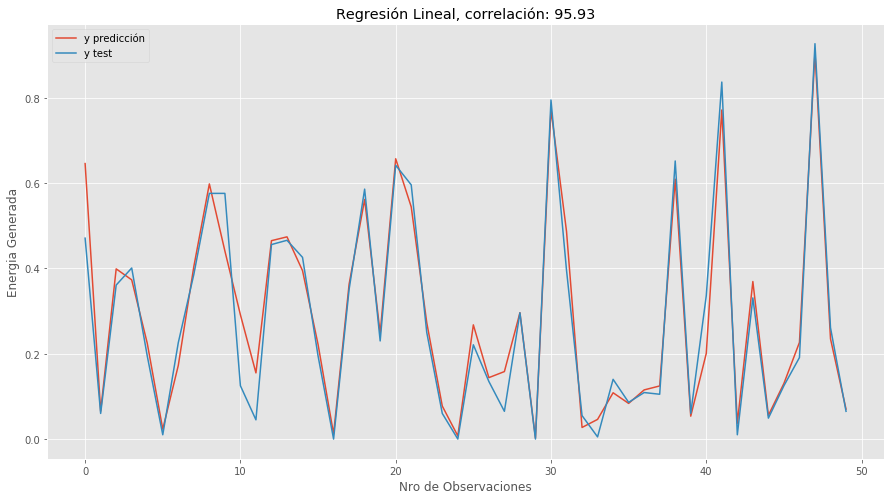

In [32]:
plt.plot(pred_test_plot, label ="y predicción")
plt.plot(y_test_plot, label ="y test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Regresión Lineal, correlación: %.2f" % (corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Nro de Observaciones")
plt.legend()
plt.show()

## Guarda Datos de Predicción

In [30]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_reglin.csv')